In [1]:
import pandas as pd

In [2]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.year.head(1)

C:\Users\alisa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0    1985
Name: year, dtype: int64

In [3]:
select_columns = ['make','model','year','displ','cylinders','trany',
                  'drive','VClass','fuelType','barrels08','city08',
                 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
vehicles = vehicles[select_columns][vehicles.year <= 2016].drop_duplicates().dropna()

In [4]:
vehicles = vehicles.sort_values(['make','model','year'])

In [5]:
vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders',
                    'Transmission','Drivetrain','Vehicle Class','Fuel Type',
                    'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                    'CO2 Emission Grams/Mile','Fuel Cost/Year']

### 聚合，把很多分类整合到一起，例如小猫，大猫，花猫都聚合成猫

In [6]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
        df[column].name, len(df[column].unique()), df[column].dtype))

In [7]:
unique_col_values(vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64


In [8]:
AUTOMATIC = 'Automatic'
MANUAL = 'Manual'

vehicles.loc[vehicles['Transmission'].str.startswith('A'),
             'Transmission Type'] = AUTOMATIC

vehicles.loc[vehicles['Transmission'].str.startswith('M'),
             'Transmission Type'] = MANUAL

In [9]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Vehicle Class'].isin(small), 
             'Vehicle Category'] = 'Small Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(midsize), 
             'Vehicle Category'] = 'Midsize Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(large), 
             'Vehicle Category'] = 'Large Cars'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Station'), 
             'Vehicle Category'] = 'Station Wagons'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Truck'), 
             'Vehicle Category'] = 'Pickup Trucks'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Special Purpose'), 
             'Vehicle Category'] = 'Special Purpose'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Sport Utility'), 
             'Vehicle Category'] = 'Sport Utility'

vehicles.loc[(vehicles['Vehicle Class'].str.lower().str.contains('van')),
             'Vehicle Category'] = 'Vans & Minivans'

In [10]:
vehicles['Model Type'] = (vehicles['Make'] + " " +
                          vehicles['Model'].str.split().str.get(0))

In [11]:
vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [12]:
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('propane'),'Propane'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

In [13]:
vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline'),'Gas Type'] = 'Regular'

vehicles.loc[vehicles['Fuel Type'] == 'Midgrade',
             'Gas Type'] = 'Midgrade'

vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'),
             'Gas Type'] = 'Premium'

vehicles.loc[vehicles['Fuel Type'] == 'Diesel',
             'Gas Type'] = 'Diesel'

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),
             'Gas Type'] = 'Natural'

### qcut()会排序然后cut，比如:  
### categories = ["low","high"]  
### list = [1,2,1,3,5,1,6]  
### list = pd.qcut(list, 2, categories)  
### list["low","low","low","low","high","low","high"]

In [14]:
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency',
                         'Moderate Efficiency','High Efficiency',
                         'Very High Efficiency']

vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'],
                                      5, efficiency_categories)

In [15]:
engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine',
                     'Large Engine', 'Very Large Engine']

vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'],
                                  5, engine_categories)

In [16]:
emission_categories = ['Very Low Emissions', 'Low Emissions',
                        'Moderate Emissions','High Emissions',
                        'Very High Emissions']

vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'],
                                 5, emission_categories)

In [17]:
fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost',
                       'Moderate Fuel Cost','High Fuel Cost',
                       'Very High Fuel Cost']

vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuel Cost/Year'],
                                5, fuelcost_categories)

In [18]:
vehicles.to_csv("vehicles_modified.csv",index=False)

### Clustering to Create Additional Categories   
### 之前的数据归一化
### This will preserve the distributions in the data and convert the values in each field to a number between 0 and 1 (technically -1 and 1, but we don't have any negatives).

In [18]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

In [19]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

In [20]:
vehicle_clusters = scaler.fit_transform(vehicles[cluster_columns])
vehicle_clusters = pd.DataFrame(vehicle_clusters, columns=cluster_columns)

### 现在我们的数据已经scaled了，我们下面会写一些函数  
### 首先是k-means来给数据分组  
### k-means会返回一个包含了分类信息的列表

In [23]:
from sklearn.cluster import KMeans
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters,random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

### 下一步我们要做的是统计每个cluster里面的汽车数量  
### 计算每个cluster的特征值的平均值   
### 然后将这些总数和平均值合并到一个表中，展现给我们

In [24]:
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster','Count']
    cluster_means = results.groupby(['Cluster'],as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

In [34]:
cluster_results = kmeans_cluster(vehicle_clusters,8)
cluster_summary = summarize_clustering(cluster_results)

In [26]:
cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
1,1,2912,0.595553,0.500215,0.395664,0.262860,0.360903,0.315677,0.400217,0.364192
2,2,3999,0.631932,0.501500,0.495338,0.218378,0.281825,0.255475,0.495517,0.422733
3,3,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
4,4,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
5,5,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
6,6,4766,0.446931,0.373387,0.437697,0.249606,0.310320,0.287299,0.437672,0.371041
7,7,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153


### 从上面我们可以看出，有些cluster里面的分类明显更多，但是这个表还不够直观，于是下一步：  
### 数据可视化

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

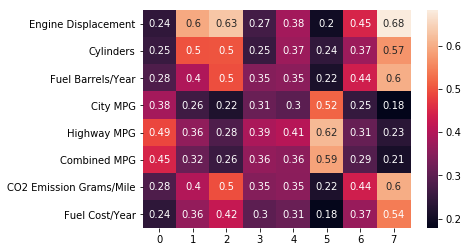

In [35]:
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

### 从上图可以看出3，4列很像，2，7也很像，3，6也略像
### 下面我们要做的就是把分组数减少到4

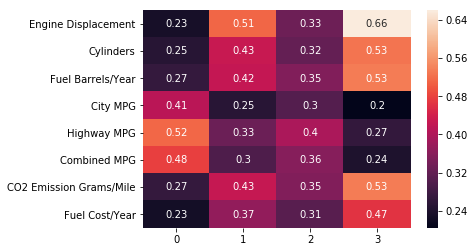

In [36]:
cluster_results = kmeans_cluster(vehicle_clusters,4)
cluster_summary = summarize_clustering(cluster_results)
sns.heatmap(cluster_summary[cluster_columns].transpose(),annot=True)

### 这些cluster现在看起来就区分度比较大了  
### 我们现在已经有很好的分类了，但是还是有个问题，我们很难看出cluster0，1，2和3代表的意义，所以下一步我们要做的是给每一组取一个名字  
### Cluster 3 vehicles seem to have large engines that consume a lot of fuel, process it inefficiently, produce a lot of emissions, and cost a lot to fill up. I'm going to label them Large Inefficient.  
### Cluster 0 vehicles have small, fuel efficient engines that don't produce a lot of emissions and are relatively inexpensive to fill up. I'm going to label them Small Very Efficient.  
### Cluster 2 vehicles are fairly balanced across every category, so I'm going to label them Midsized Balanced.  
### Cluster 1 vehicles have large engines but are more moderately efficient than the vehicles in Cluster 1, so I'm going to label them Large Moderately Efficient.  
### 现在我们把这些名字加到<code>cluster_results</code>的新一列<em>Cluster Name</em>里

In [37]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==0]='Small Very Efficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==1]='Large Moderately Efficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==2]='Midsized Balanced'
cluster_results['Cluster Name'][cluster_results['Cluster']==3]='Large Inefficient'

C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\alisa\Anaconda3\lib\

In [40]:
cluster_results.to_csv('v_clustered.csv',index=False)